# All Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
def prettify_col_title(col):
    for_title = col.split("_")
    setting = for_title[-1].capitalize()
    model = for_title[0:2]
    model = [x.capitalize() for x in model]
    model = "".join(model)
    return setting, model

def add_arrow(latex_code):
    latex_code = latex_code\
                        .replace("Jain","$\\uparrow$ Jain")\
                        .replace("QF","$\\uparrow$ QF")\
                        .replace("Ent","$\\uparrow$ Ent")\
                        .replace("FSat","$\\uparrow$ FSat")\
                        .replace("Gini","$\\downarrow$ Gini")\
                        .replace("VoCD","$\\downarrow$ VoCD")
    return latex_code

def add_midrule(latex_code):
    for dataset_name in dataset_order[1:]:
        latex_code = latex_code.replace(dataset_name, f"\midrule \n{dataset_name}")
    return latex_code

dataset_order = ["amazon-lb","lastfm","ml-1m","book-x", "amazon-is","amazon-dm"]
original_order = ['Jain', 'QF', 'Ent', 'FSat', 'Gini', 'Gini-w','VoCD']

In [4]:
all_results = pd.read_excel(("../most_fair_unfair_results_all.xlsx"), index_col=0)

## Plot

## Selected for Main Paper

In [5]:
all_results.columns

Index(['measure', 'most_unfair_repeatable', 'most_fair_repeatable',
       'most_fair_nonrepeatable', 'most_unfair_nonrepeatable', 'k', 'version'],
      dtype='object')

### Higher is better

In [6]:
#Just to get the legend 
list_df = [["lastfm","ml-1m"]]
palette = "colorblind"
list_k = [1,2,3,5,10,15,20]
additional_plotting_dict_dashed = dict(dashes=True)
additional_plotting_dict_nondashed = dict(dashes=False, linestyle=":")

def forward(x):
    return x**(1/2)

def inverse(x):
    return x**2 * np.sign(x)

def create_fake_legend_higher_better(additional_plotting_dict):
    
    for df in list_df:

        fig, ax= plt.subplots(2, 2, figsize=(10,9))
        for d, data in enumerate(df):
            
            this_data = all_results.loc[data]
            this_data = this_data.reset_index()
            this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
            this_data["k"] = this_data["k"].apply(int)
            
            for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):


                sns.lineplot(this_data.query("version=='ori'"), x="k", y=col,hue="measure",
                            style="measure", ax=ax[d,i],
                            mec=None,
                            mfc="none",
                            palette=palette,
                            **additional_plotting_dict)

        #takeout legend
        measure_handle, measure_label = plt.gca().get_legend_handles_labels()
        plt.show()
        fig, ax= plt.subplots(2, 2, figsize=(10,9))
        for d, data in enumerate(df):
            
            this_data = all_results.loc[data]
            this_data = this_data.reset_index()
            this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
            this_data["k"] = this_data["k"].apply(int)

            
            for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

                sns.lineplot(this_data.query("version=='ori'"), x="k", y=col, style="version",markers="x", ax=ax[d,i], 
                            mec=None,
                            mfc="none",
                            palette=palette,
                            **additional_plotting_dict)
        ori_handle,ori_label = plt.gca().get_legend_handles_labels()
        plt.show()

        fig, ax= plt.subplots(2, 2, figsize=(10,9))
        for d, data in enumerate(df):
            
            this_data = all_results.loc[data]
            this_data = this_data.reset_index()
            this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
            this_data["k"] = this_data["k"].apply(int)

            
            for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

                sns.lineplot(this_data.query("version=='our'"), x="k", y=col, style="version",markers="o", ax=ax[d,i],  
                            mec=None,
                            mfc="none",
                            palette=palette,
                            **additional_plotting_dict
                            )
        our_handle,our_label = plt.gca().get_legend_handles_labels()
        plt.show()
    return ori_handle, ori_label, our_handle, our_label, measure_handle, measure_label


In [7]:
%%capture
ori_handle, ori_label, our_handle, our_label, measure_handle, measure_label = create_fake_legend_higher_better(additional_plotting_dict_dashed)
ori_handle_nd, ori_label_nd, our_handle_nd, our_label_nd, measure_handle_nd, measure_label_nd = create_fake_legend_higher_better(additional_plotting_dict_nondashed)

In [8]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
main_plotting_dict = dict(
                        hue="measure",
                        style="measure", 
                        linestyle = ":",)
    
additional_plotting_dict = {"mec":None,"mfc":"none", "markersize":10,"palette":"colorblind"}
list_k = [1,2,3,5,10,15,20]

def forward(x):
    return np.where(x>0,x**(1/2),x)

def inverse(x):
    return np.where(x>0,x**2 * np.sign(x),x)

def forward4(x):
    return np.where(x>0,x**(1/4),x)

def inverse4(x):
    return np.where(x>0,x**4 * np.sign(x),x)

def forward6(x):
    return np.where(x>0,x**(1/12),x)

def inverse6(x):
    return np.where(x>0,x**12 * np.sign(x),x)

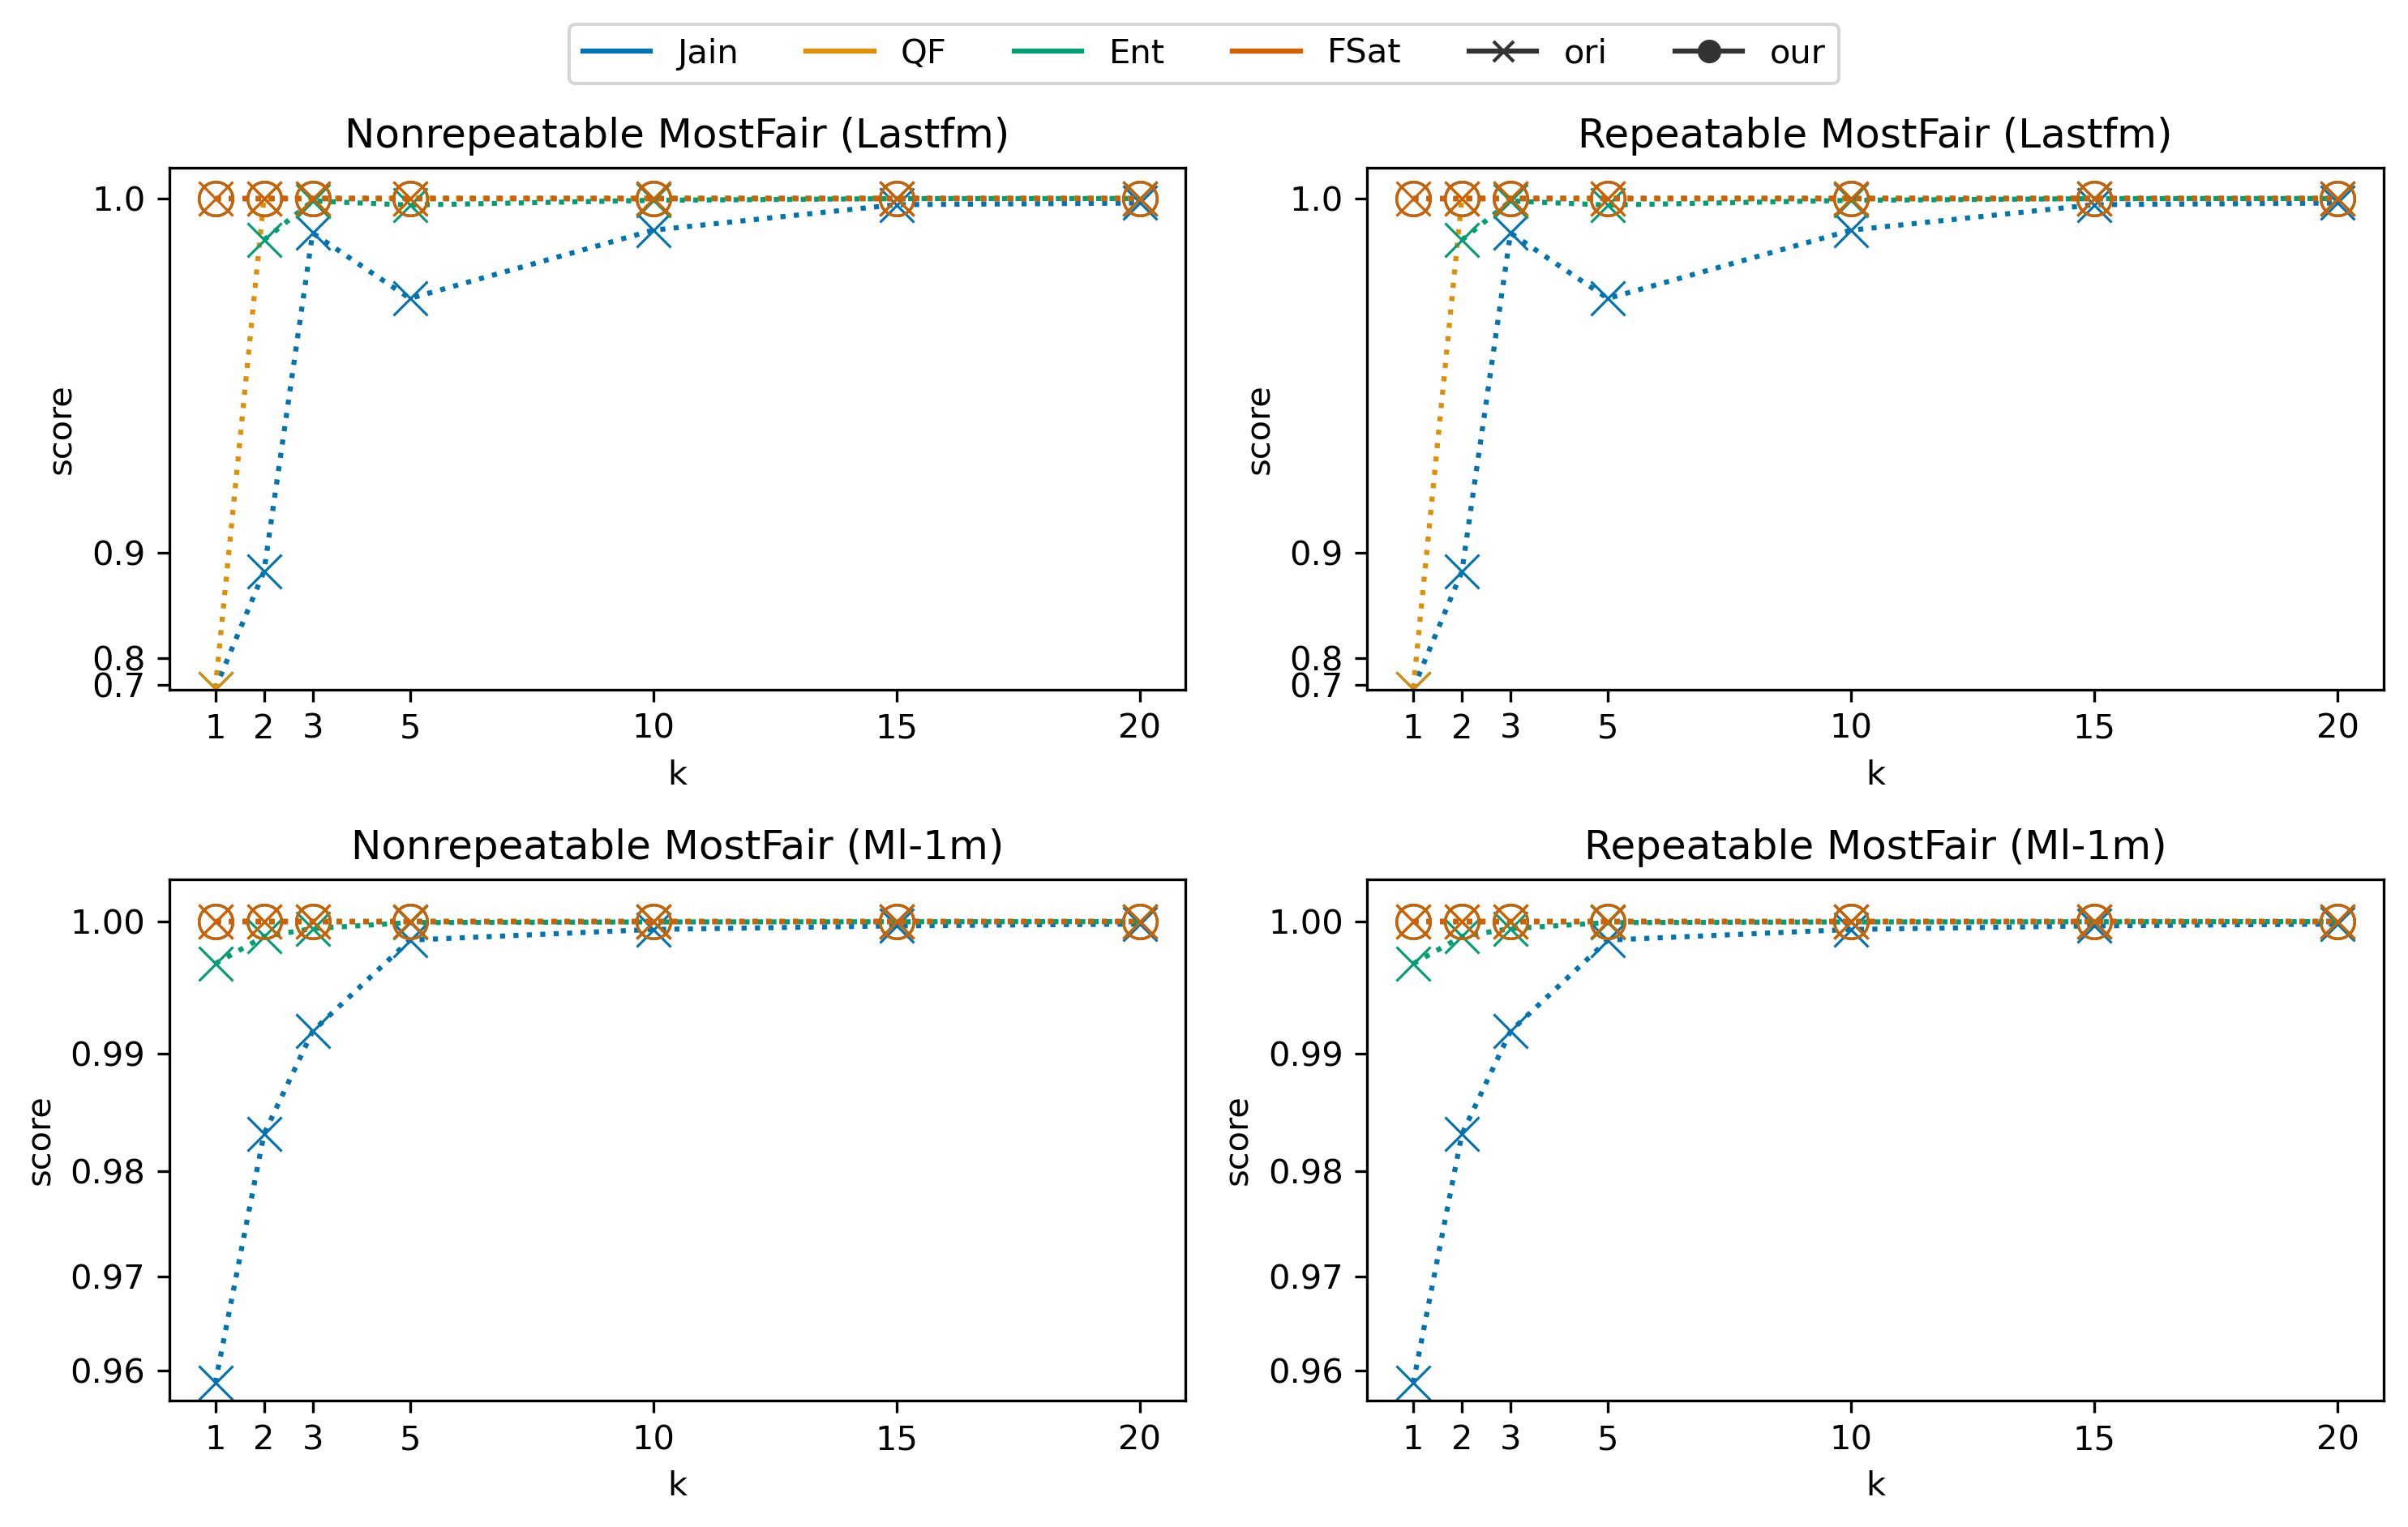

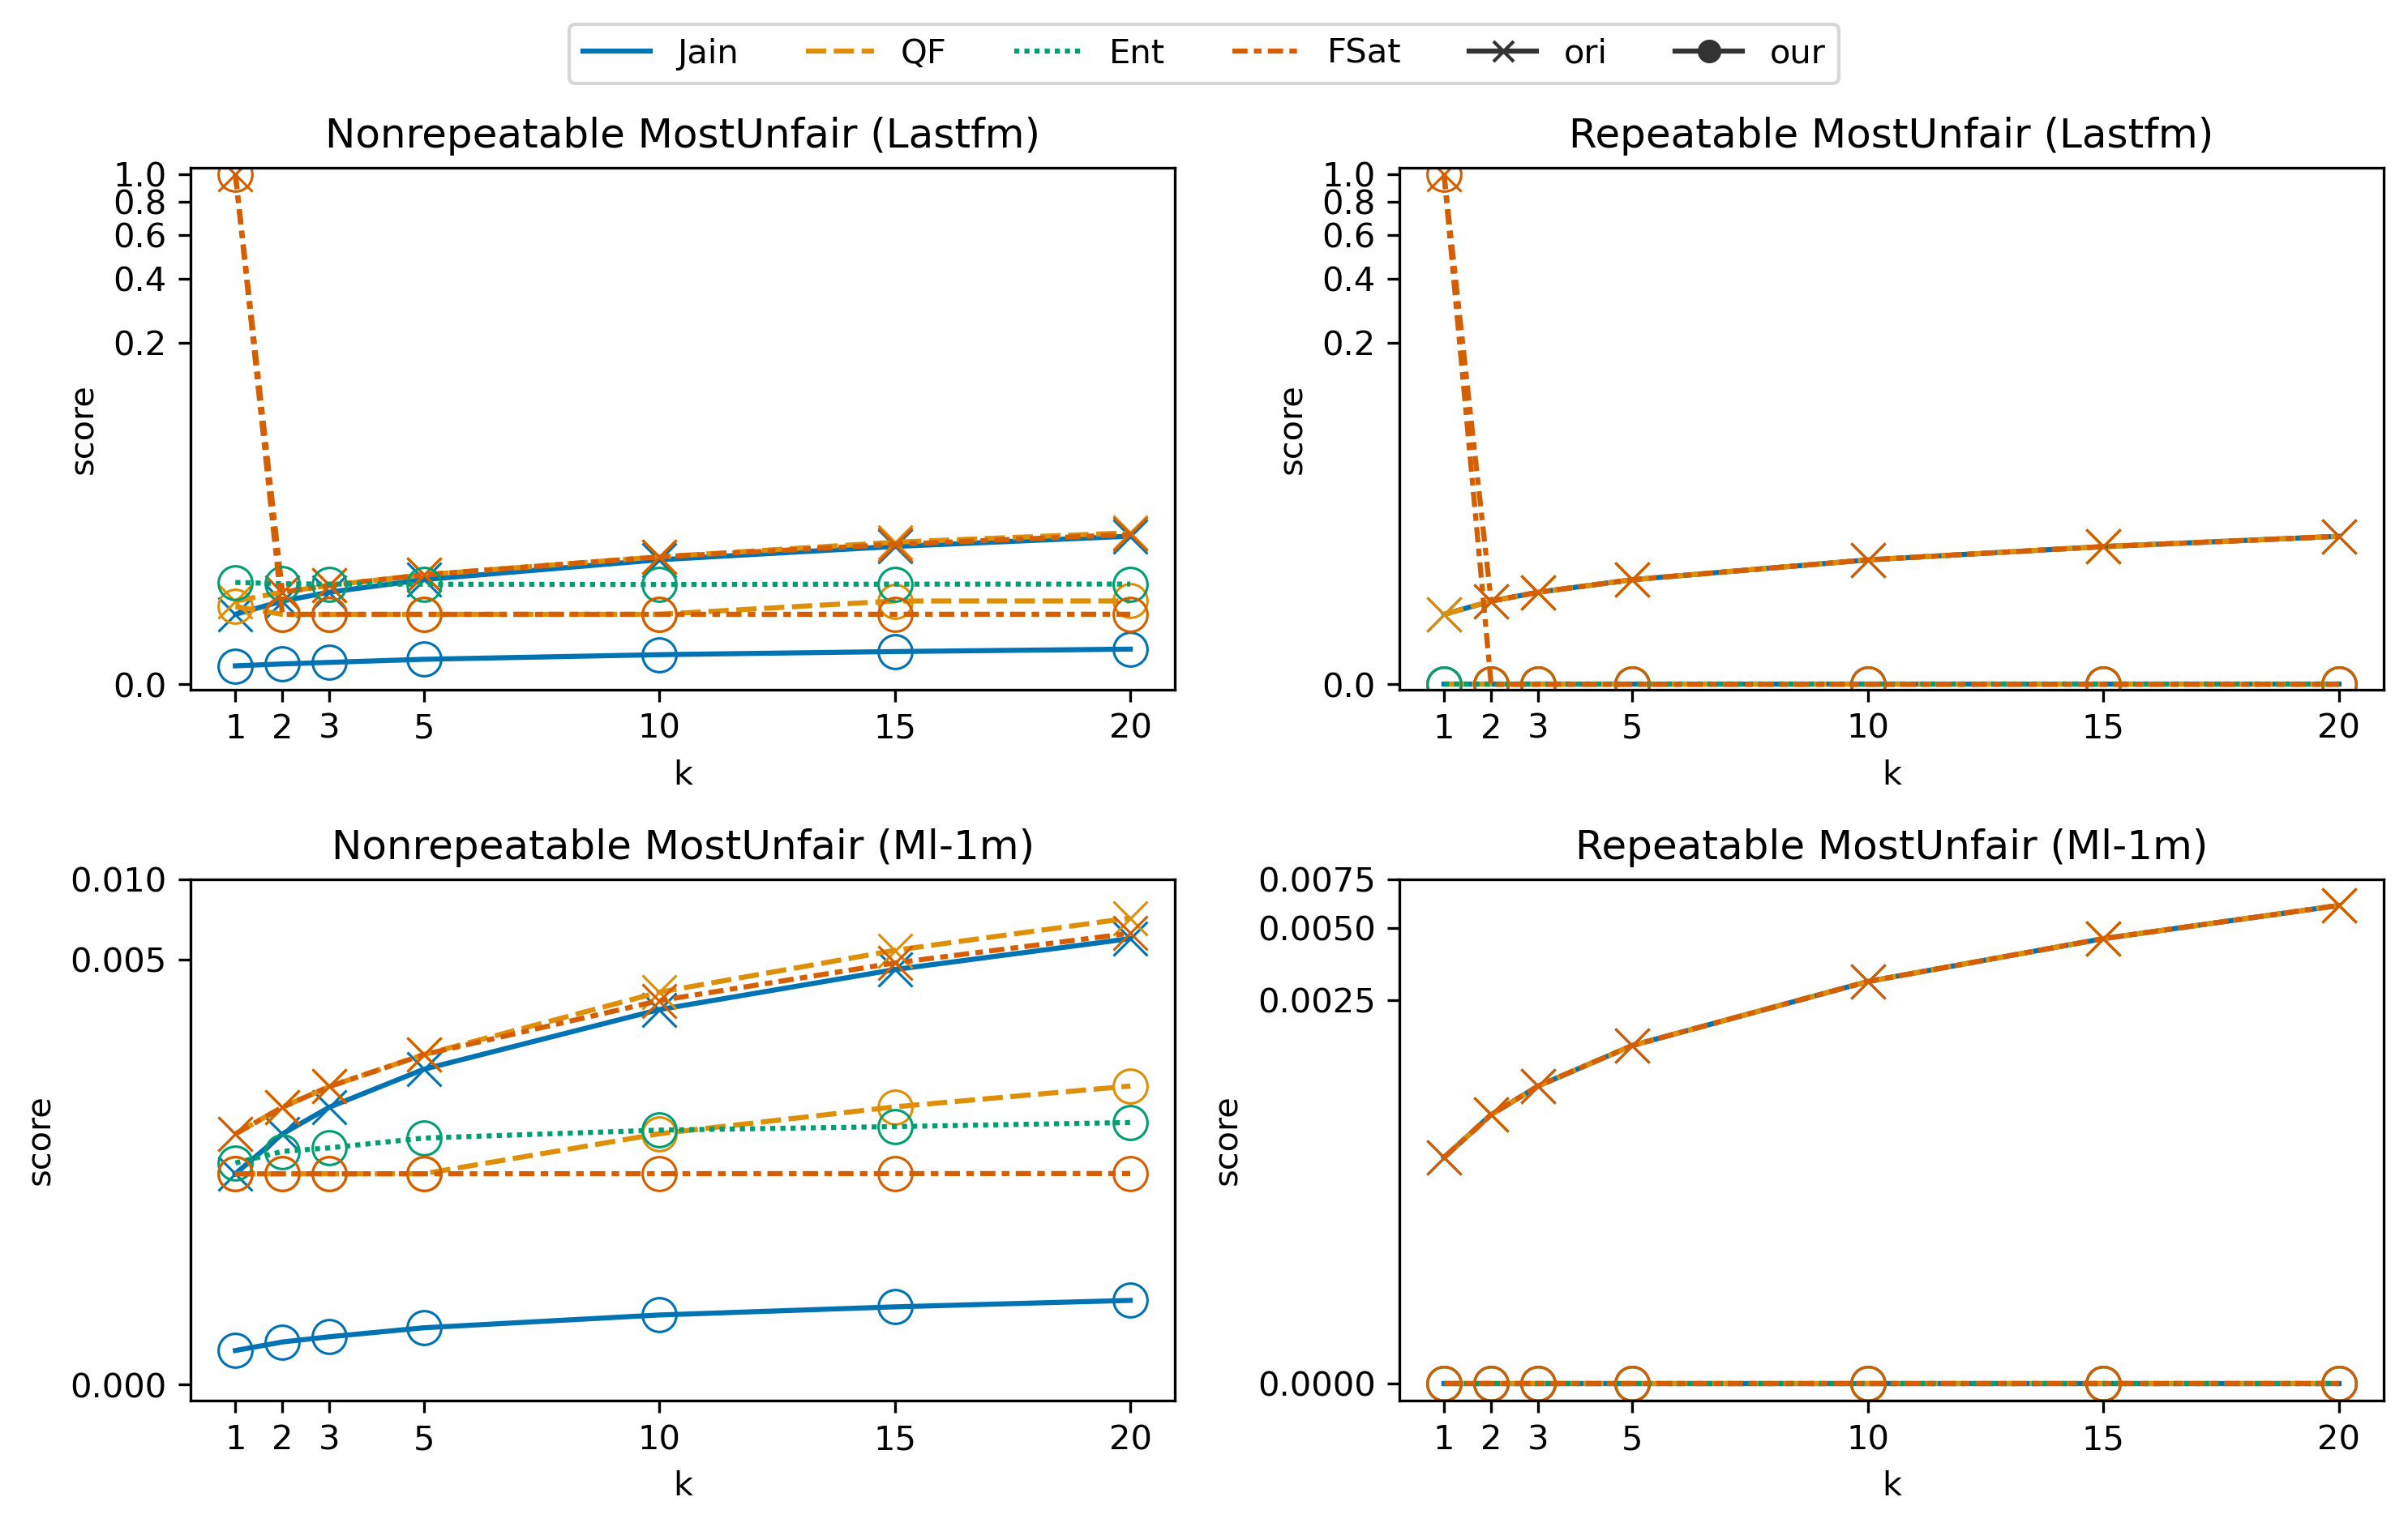

In [9]:
list_df = [["lastfm","ml-1m"]]

for df in list_df:

    fig, ax= plt.subplots(2, 2, figsize=(10,6))

    #plot mostfair
    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col,
                        markers="x", dashes=False, ax=ax[d,i], **main_plotting_dict, **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col,
                        markers="o", dashes=False, ax=ax[d,i], **main_plotting_dict, **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score') #fix y-axis naming
            ax[d,i].set(xticks=list_k)  #fix x-ticks
            ax[d,i].set_yscale('function', functions=(inverse6,forward6))
            ax[d,i].set_ylim(top=1.005) 
            if data == "ml-1m":
                ax[d,i].set_ylim(top=1.003) 


    [[c.get_legend().remove() for c in r] for r in ax]
               
    all_labels = measure_label_nd + ori_label_nd + our_label_nd

    fig.legend(measure_handle_nd + ori_handle_nd + our_handle_nd, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.05), ncol=len(all_labels)
            )

    plt.tight_layout()

    #plot mostunfair
    fig, ax= plt.subplots(2, 2, figsize=(10,6))

    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_unfair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col, dashes=True,
                        markers="x", 
                        ax=ax[d,i], 
                        **main_plotting_dict,
                        **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col, dashes=True,
                        markers="o", 
                        ax=ax[d,i], 
                        **main_plotting_dict,
                        **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score') #fix y-axis naming
            ax[d,i].set(xticks=list_k)  #fix x-ticks 

            ax[d,i].set_ylim(bottom=-0.01)
  
            ax[d,i].set_yscale('function', functions=(forward4,inverse4))

            list_y_ticks = ax[d,i].get_yticks()

            new_list_y_ticks = [c for c in list_y_ticks if c>=0]

            ax[d,i].set(yticks=new_list_y_ticks)#fix y-ticks 
            if new_list_y_ticks[-1]>1:
                ax[d,i].set_ylim(top=1.05, bottom=-0.01) 

                            
       
    [[c.get_legend().remove() for c in r] for r in ax]
    all_labels = measure_label + ori_label + our_label
    fig.legend(measure_handle + ori_handle + our_handle, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.05), ncol=len(all_labels)
            )
    
    plt.tight_layout()

### Lower is better

Legend

In [10]:
#Just to get the legend 

def create_fake_legend_lower_better(additional_plotting_dict):
    list_df = [["lastfm","ml-1m"]]
    for df in list_df:

        fig, ax= plt.subplots(2, 2, figsize=(10,9))
        for d, data in enumerate(df):
            
            this_data = all_results.loc[data]
            this_data = this_data.reset_index()
            this_data = this_data.loc[this_data.measure.str.contains("Gini")]
            this_data["k"] = this_data["k"].apply(int)
            
            for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):
                sns.lineplot(this_data.query("version=='ori'"), x="k", y=col, 
                            hue="measure",
                            style="measure",
                            mec=None,
                            mfc="none",
                            palette=palette, ax=ax[d,i], **additional_plotting_dict)

        #takeout legend
        measure_handle, measure_label = plt.gca().get_legend_handles_labels()

        fig, ax= plt.subplots(2, 2, figsize=(10,9))
        for d, data in enumerate(df):
            
            this_data = all_results.loc[data]
            this_data = this_data.reset_index()
            this_data = this_data.loc[this_data.measure.str.contains("Gini")]
            # this_data = this_data.loc[~this_data.measure.str.contains("w")]
            this_data["k"] = this_data["k"].apply(int)

            for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

                sns.lineplot(this_data.query("version=='ori'"), x="k", y=col, style="version",markers="x", ax=ax[d,i], **additional_plotting_dict)
        ori_handle,ori_label = plt.gca().get_legend_handles_labels()

        fig, ax= plt.subplots(2, 2, figsize=(10,9))
        for d, data in enumerate(df):
            
            this_data = all_results.loc[data]
            this_data = this_data.reset_index()
            this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
            this_data["k"] = this_data["k"].apply(int)

            
            for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

                sns.lineplot(this_data.query("version=='our'"), x="k", y=col, style="version",markers="o", ax=ax[d,i],**additional_plotting_dict)
        our_handle, our_label = plt.gca().get_legend_handles_labels()
    
    return ori_handle, ori_label, our_handle, our_label, measure_handle, measure_label 

In [11]:
%%capture
ori_handle, ori_label, our_handle, our_label, measure_handle, measure_label = create_fake_legend_lower_better(additional_plotting_dict_dashed)
ori_handle_nd, ori_label_nd, our_handle_nd, our_label_nd, measure_handle_nd, measure_label_nd = create_fake_legend_lower_better(additional_plotting_dict_nondashed)

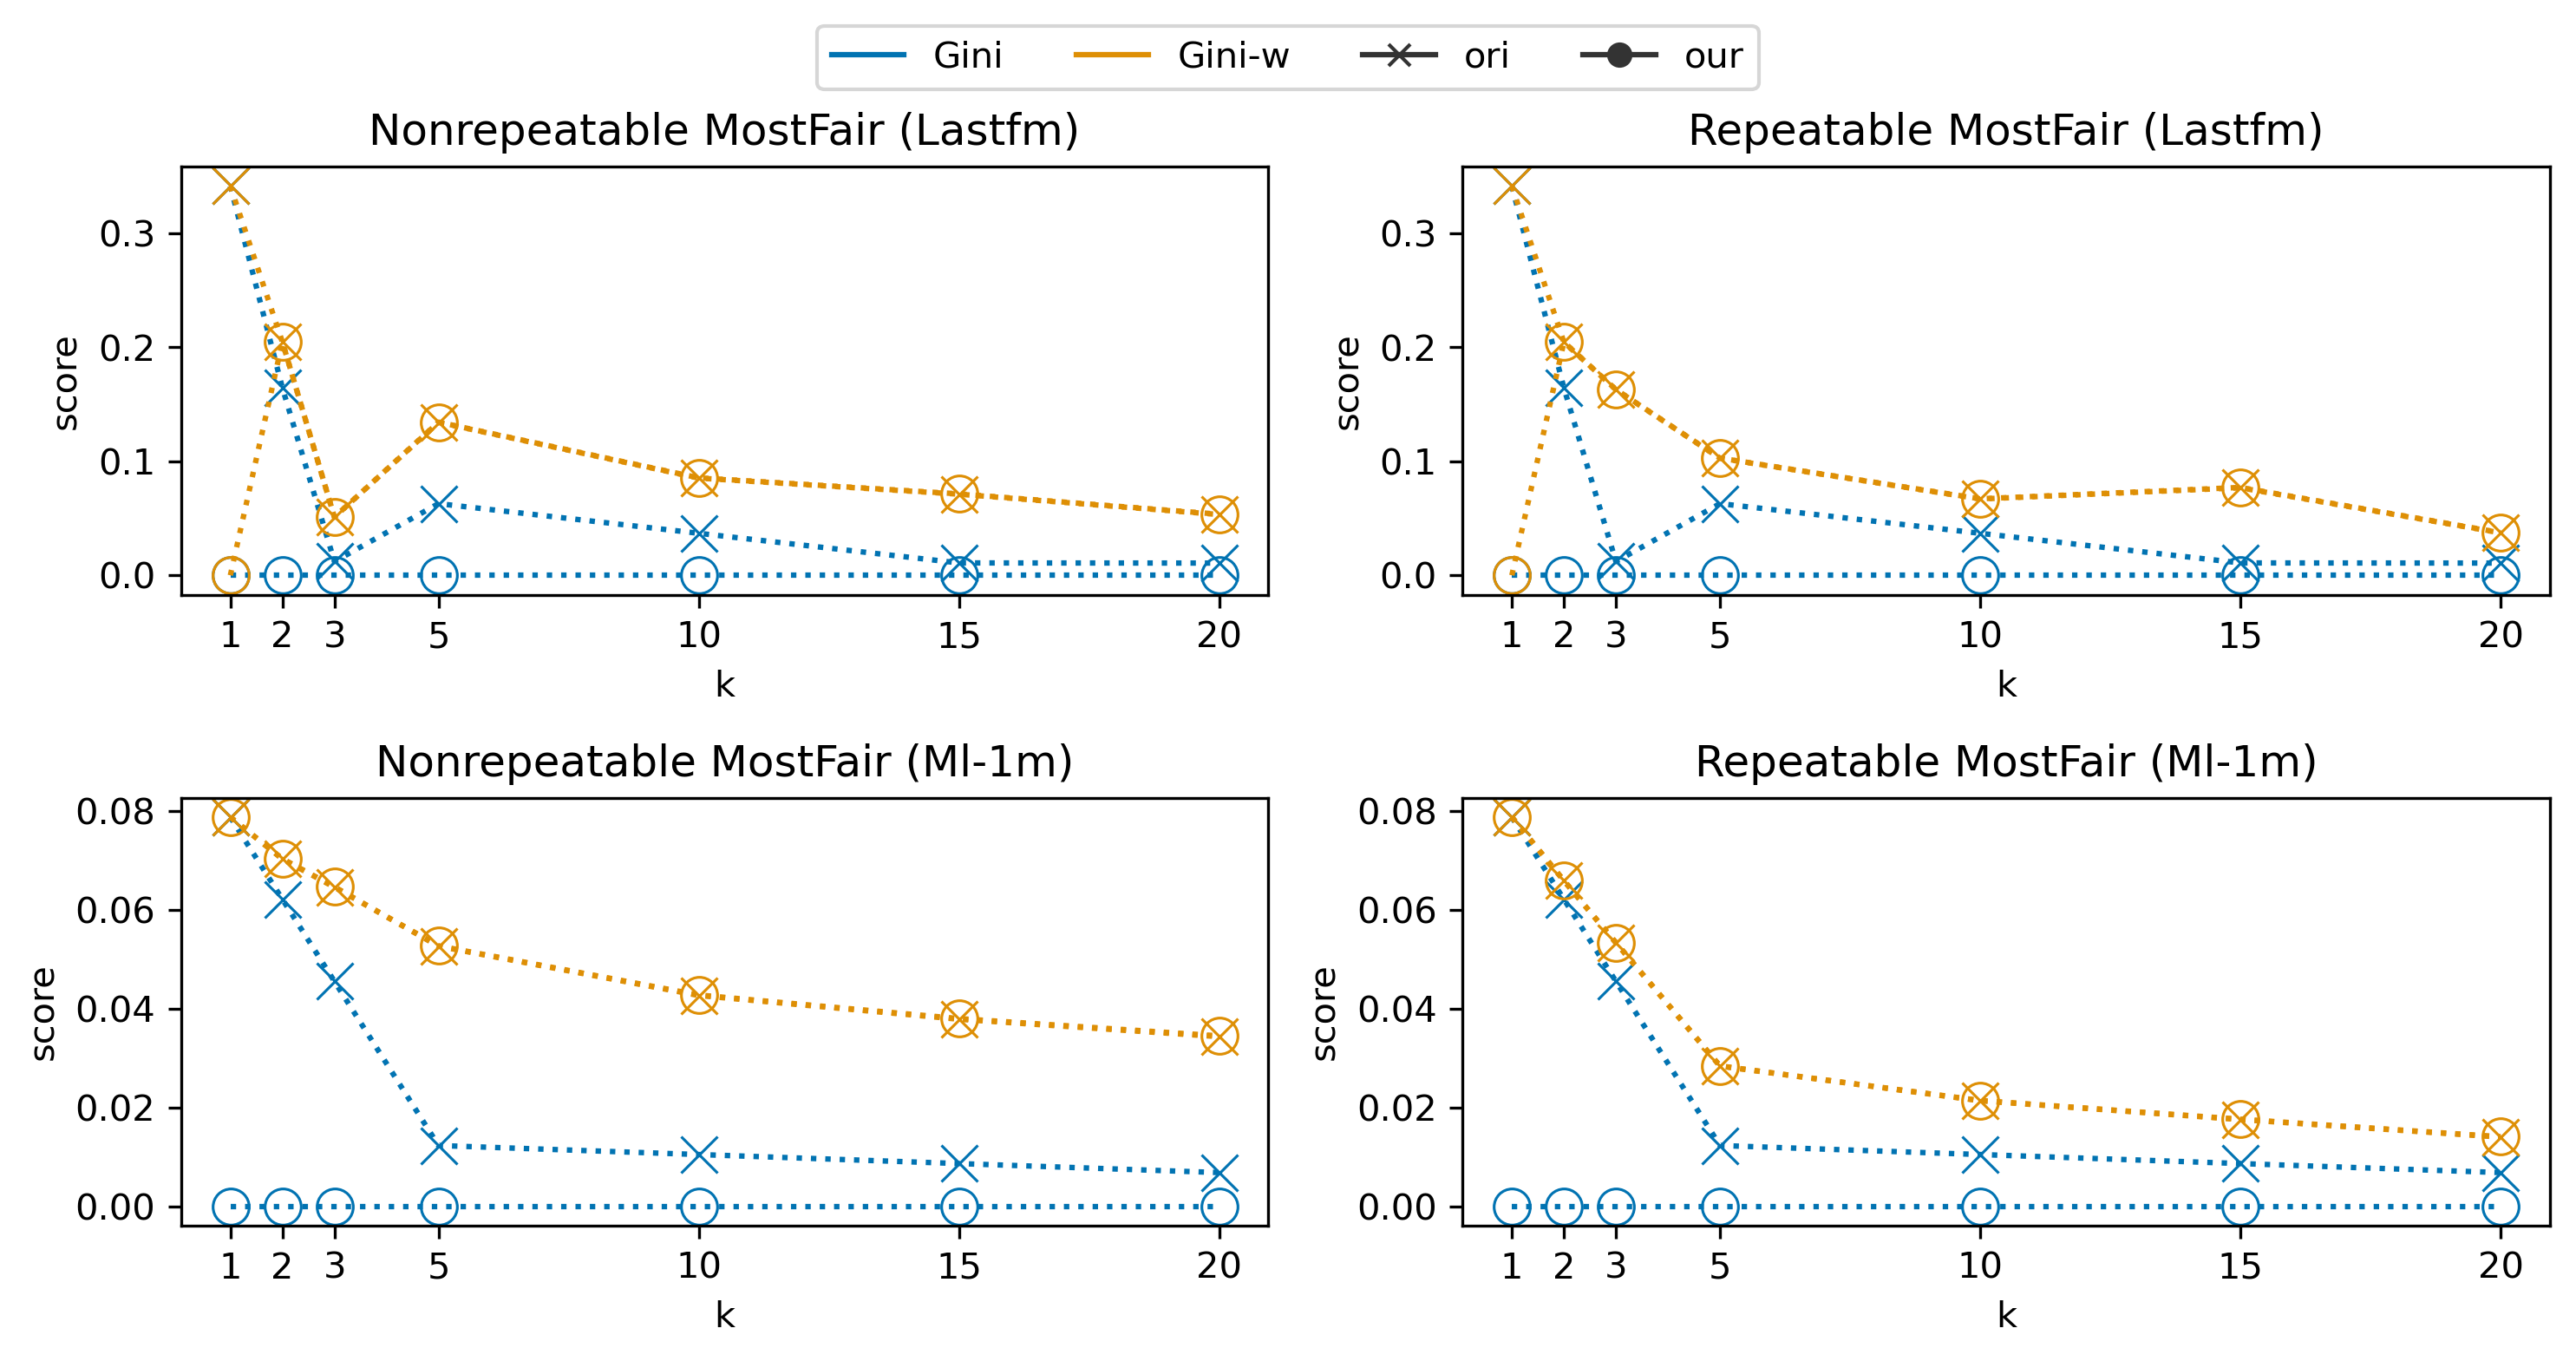

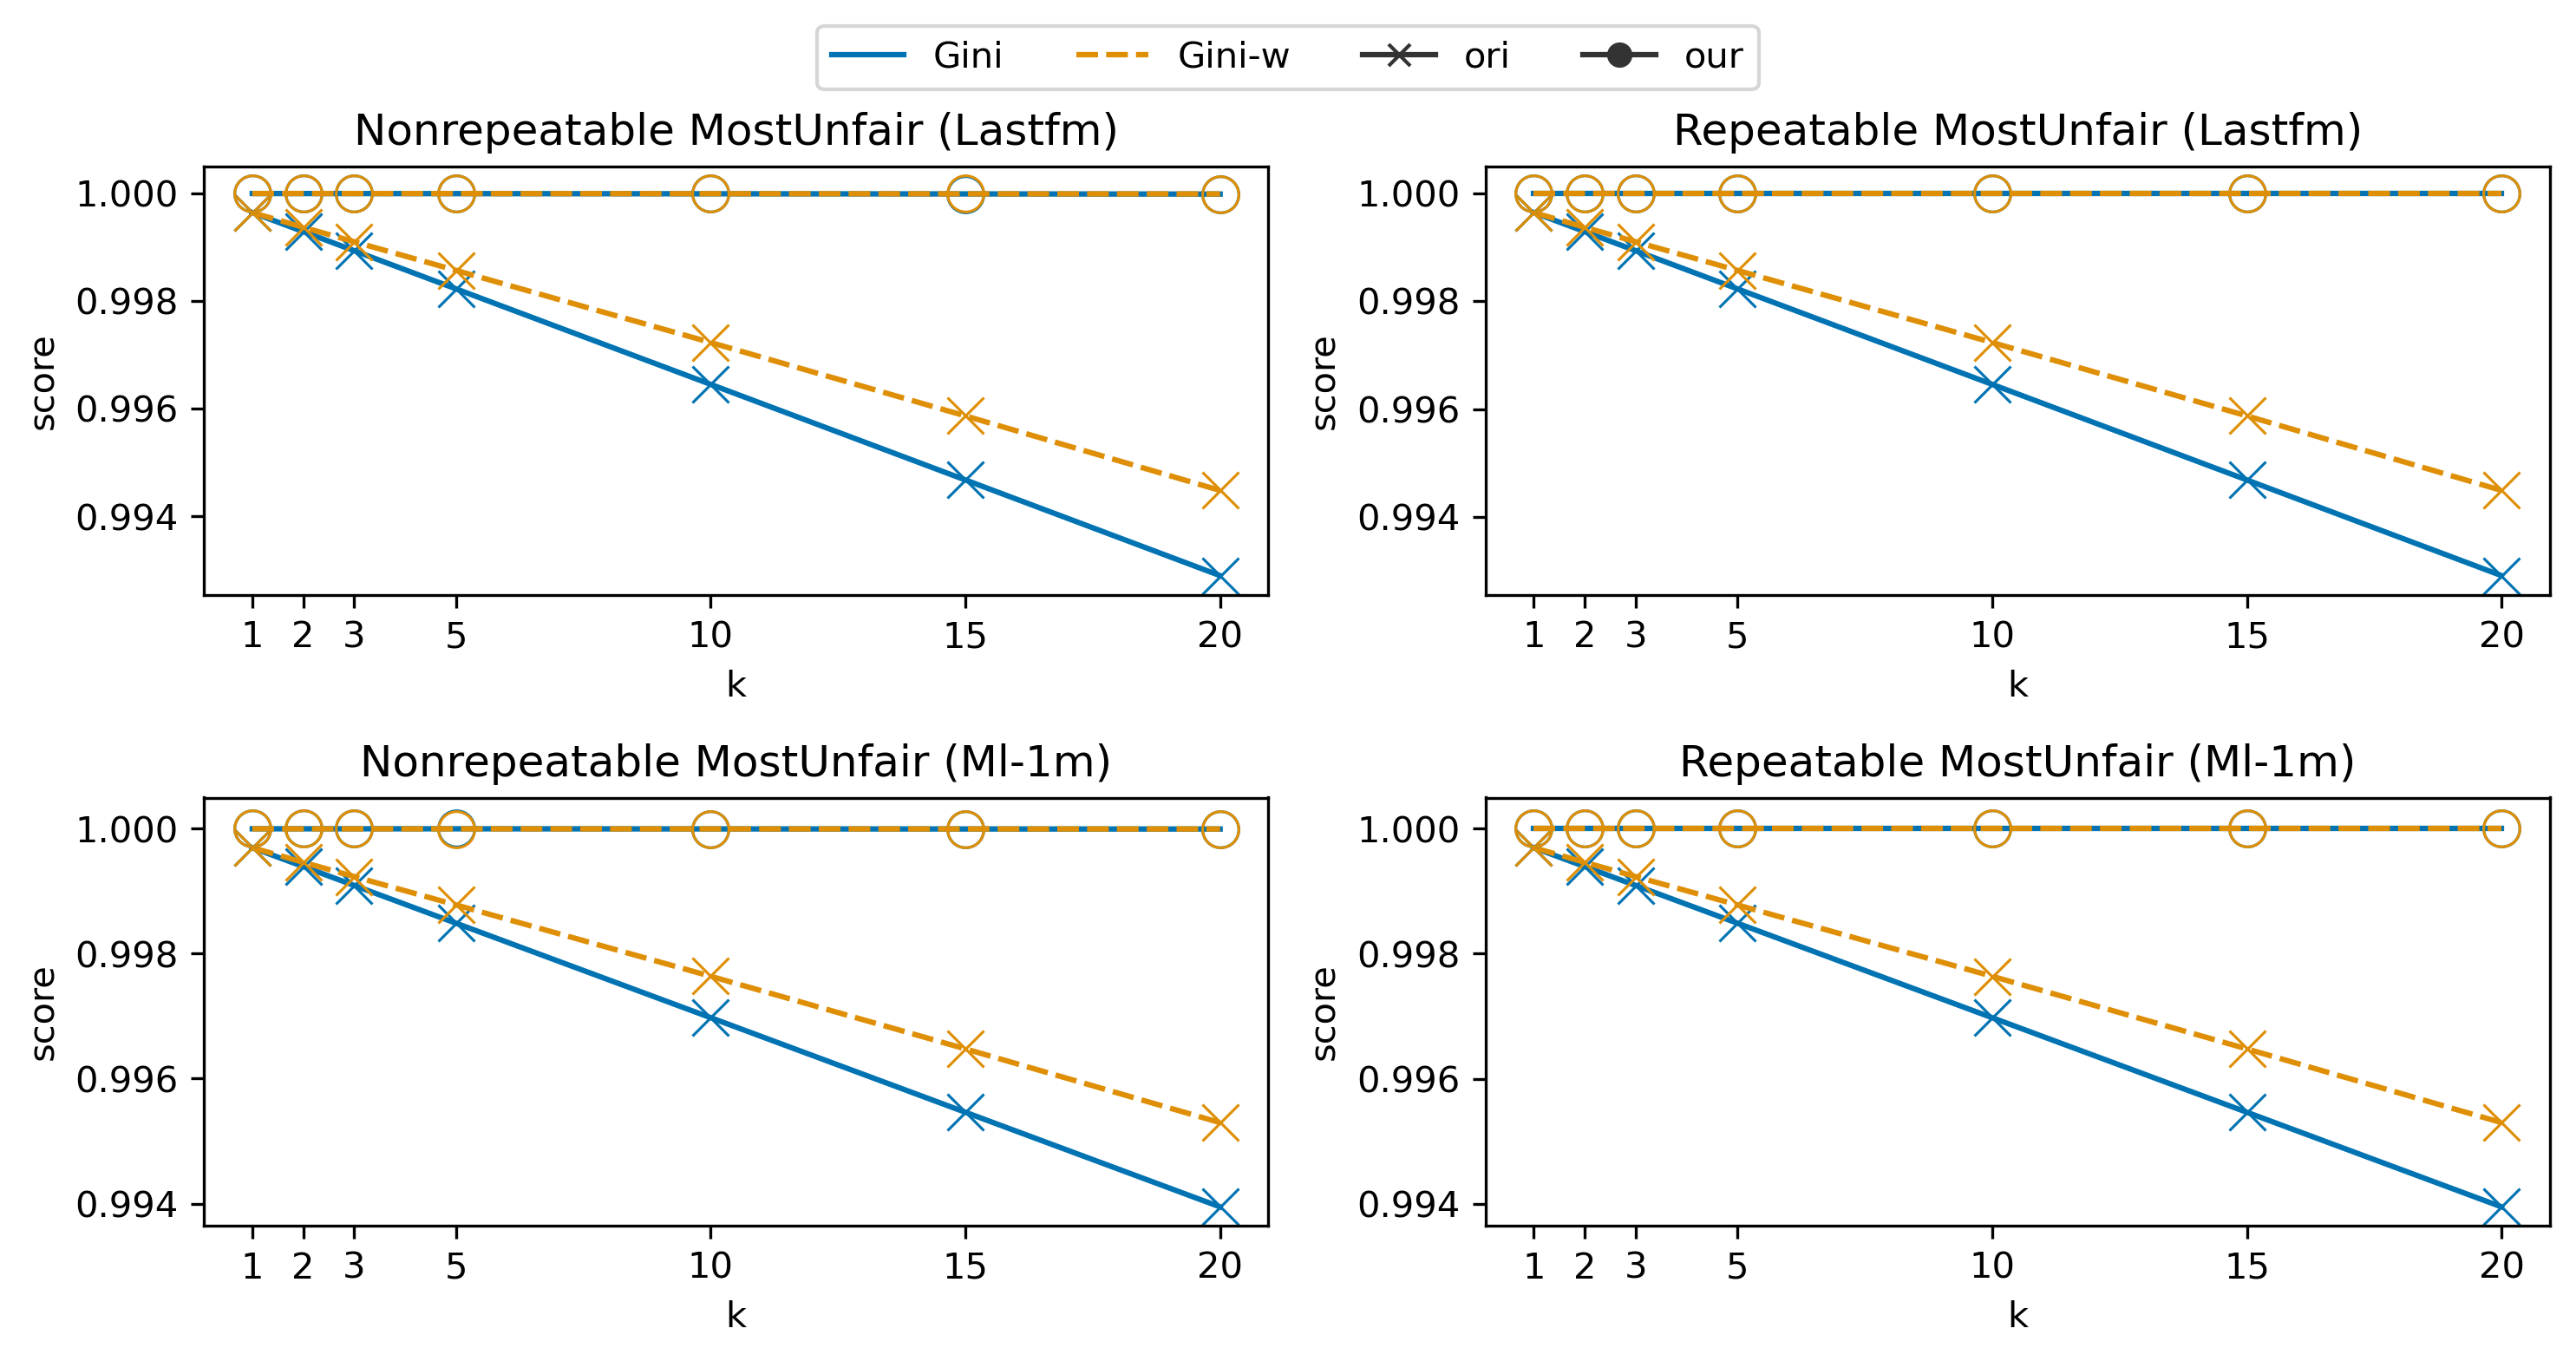

In [12]:
list_df = [["lastfm","ml-1m"]]
palette = "colorblind"

for df in list_df:

    fig, ax= plt.subplots(2, 2, figsize=(10,5))
    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[this_data.measure.str.contains("Gini")]
        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col, markers="x", dashes=False, ax=ax[d,i], **main_plotting_dict, **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col, markers="o", dashes=False, ax=ax[d,i], **main_plotting_dict, **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score') #fix y-axis naming
            ax[d,i].set(xticks=list_k)  #fix x-ticks

    [[c.get_legend().remove() for c in r] for r in ax]
    all_labels = measure_label_nd + ori_label_nd + our_label_nd
    fig.legend(measure_handle_nd + ori_handle_nd + our_handle_nd, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.05), ncol=len(all_labels)
            )

    plt.tight_layout()

    fig, ax= plt.subplots(2, 2, figsize=(10,5))
    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[this_data.measure.str.contains("Gini")]

        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_unfair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col, markers="x", dashes=True, ax=ax[d,i], **main_plotting_dict, **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col, markers="o", dashes=True, ax=ax[d,i], **main_plotting_dict, **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score') #fix y-axis naming
            ax[d,i].set(xticks=list_k)  #fix x-ticks
            
            
        ax[d,0].set_yscale('function', functions=(forward,inverse))
        ax[d,1].set_yscale('function', functions=(forward,inverse))
        ax[d,0].set_ylim(top=1.0005,)
        ax[d,1].set_ylim(top=1.0005,)
       
    [[c.get_legend().remove() for c in r] for r in ax]
    all_labels = measure_label + ori_label + our_label
    fig.legend(measure_handle + ori_handle + our_handle, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.05), ncol=len(all_labels)
            )
    
    plt.tight_layout()

## Appendix

In [13]:
%%capture
ori_handle, ori_label, our_handle, our_label, measure_handle, measure_label = create_fake_legend_higher_better(additional_plotting_dict_dashed)
ori_handle_nd, ori_label_nd, our_handle_nd, our_label_nd, measure_handle_nd, measure_label_nd = create_fake_legend_higher_better(additional_plotting_dict_nondashed)

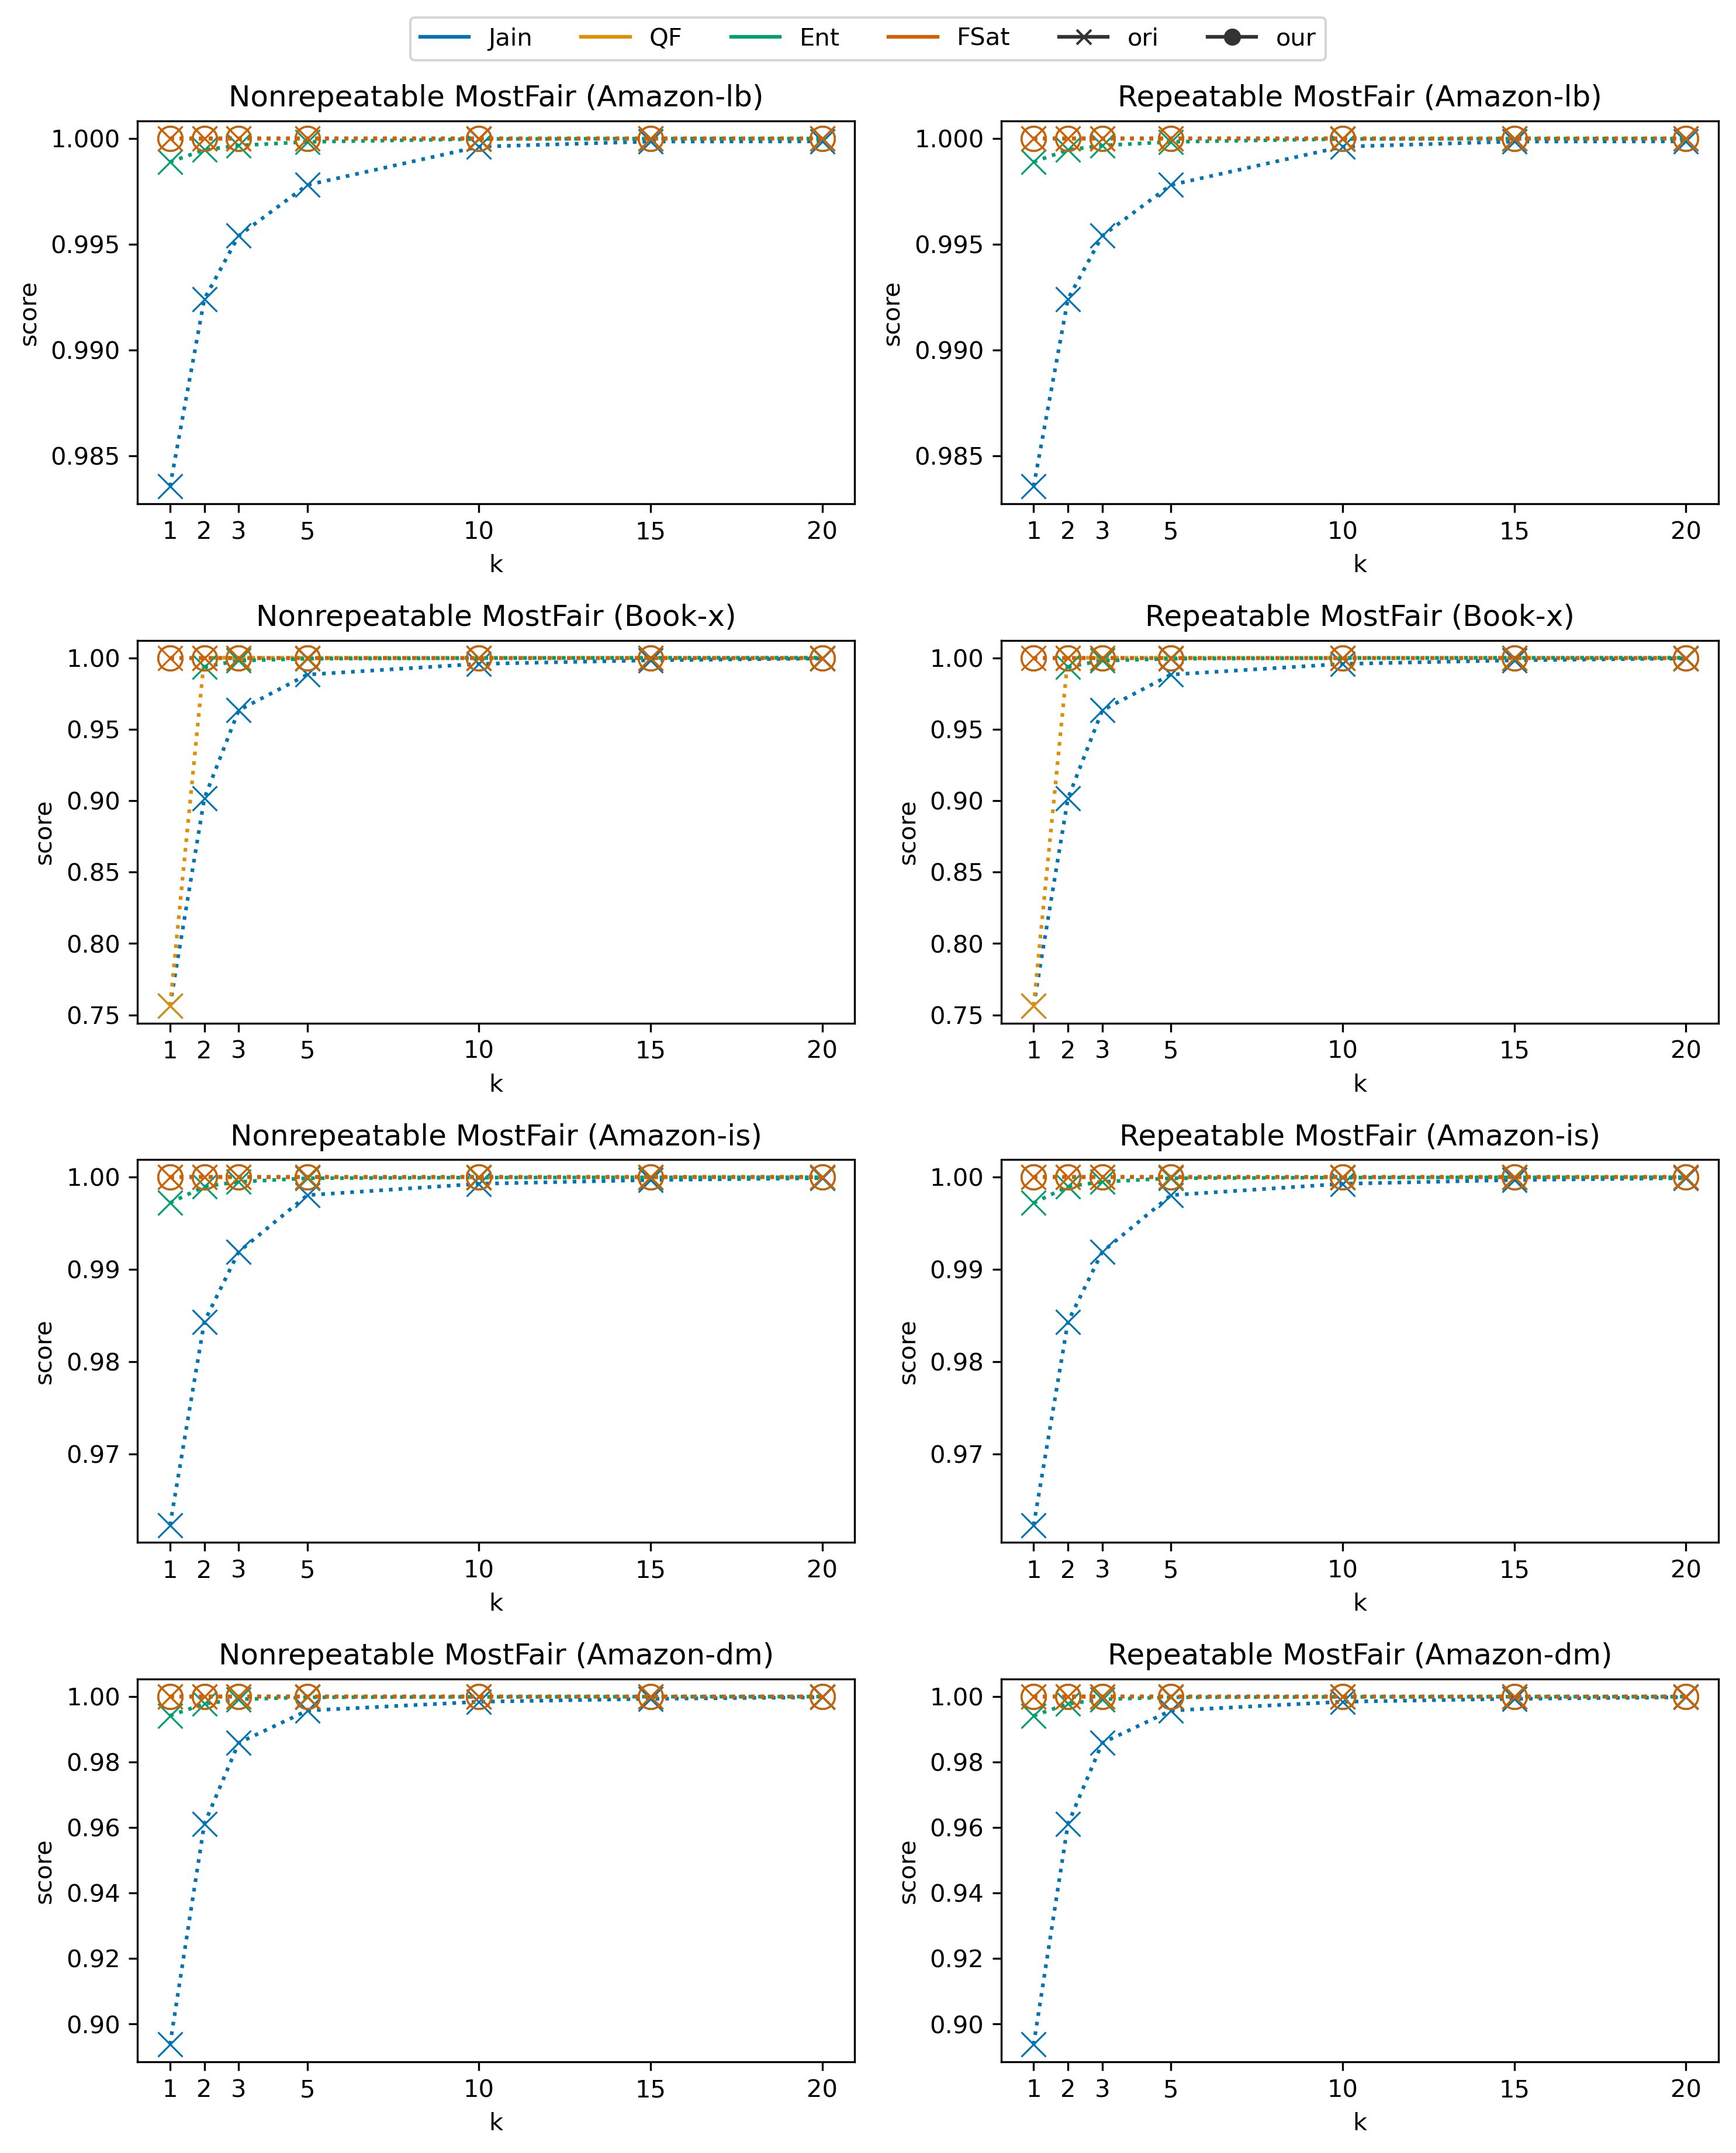

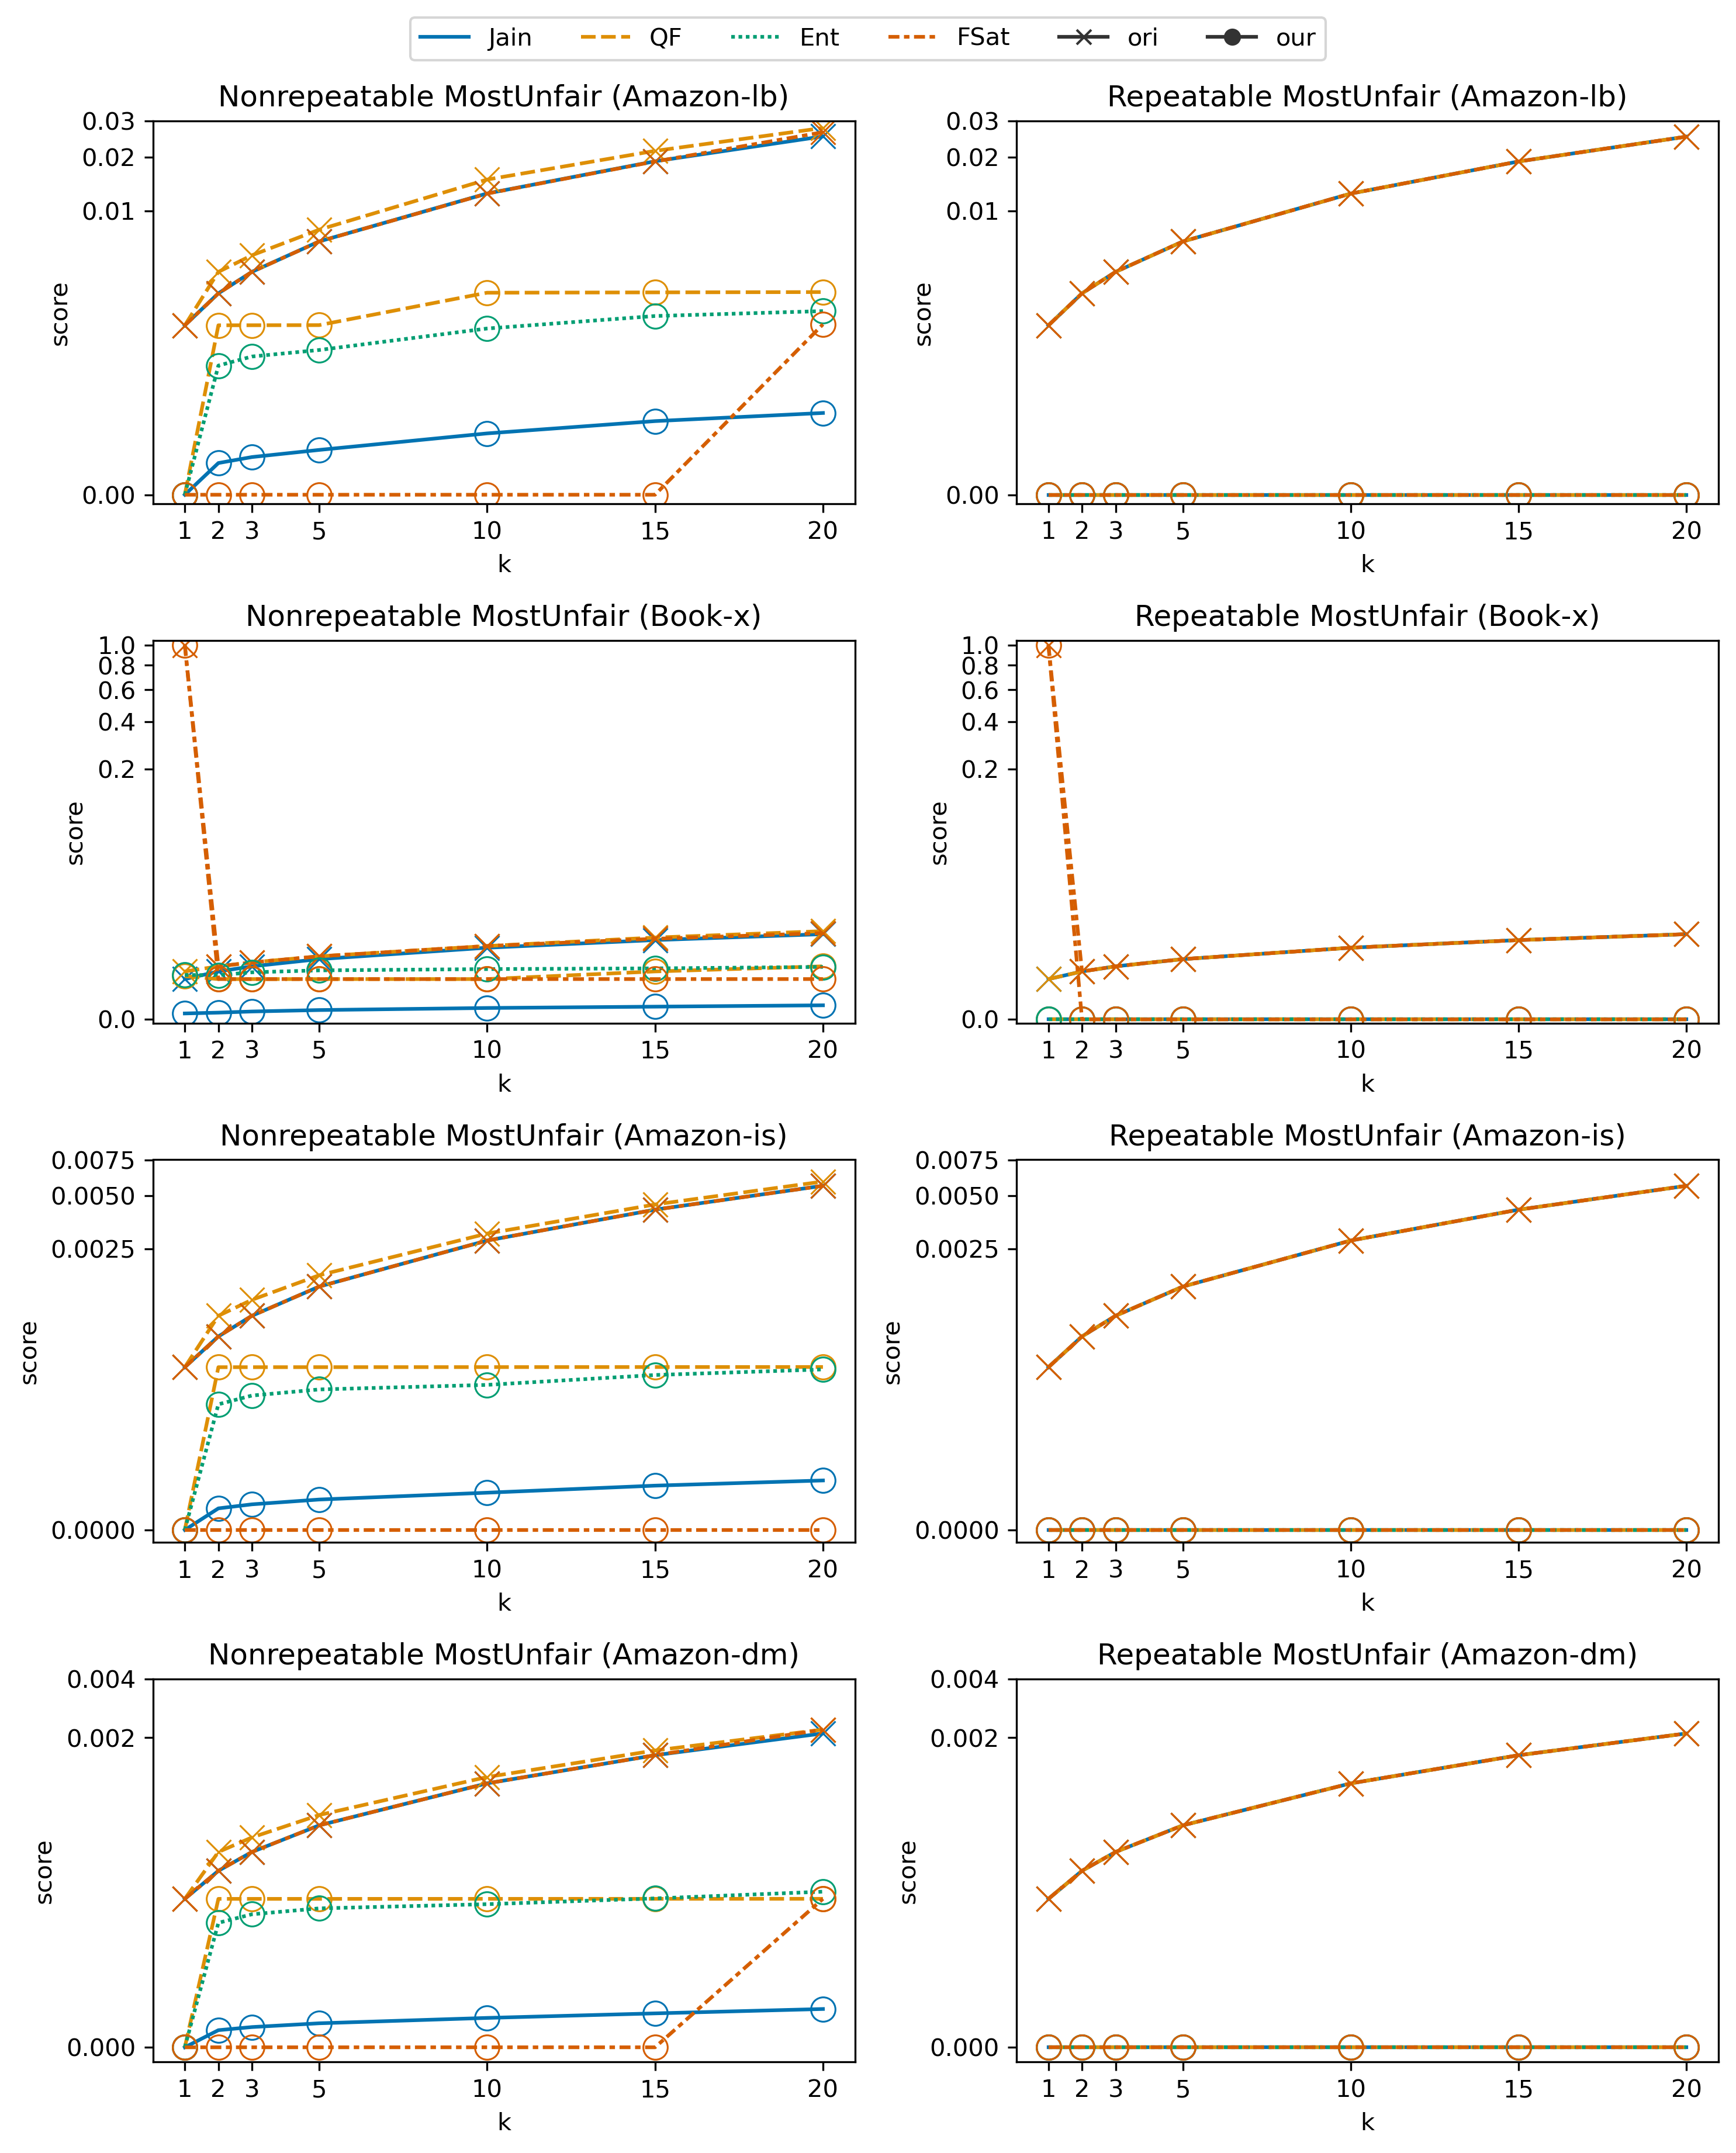

In [14]:
list_df = [["amazon-lb","book-x","amazon-is","amazon-dm"]]

for df in list_df:

    fig, ax= plt.subplots(4, 2, figsize=(10,12))
    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col,hue="measure", linestyle=":",
                        style="measure", markers="x", dashes=False, ax=ax[d,i], **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col,hue="measure", linestyle=":",
                        style="measure", markers="o", dashes=False, ax=ax[d,i], **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score')#fix y-axis naming
            ax[d,i].set(xticks=list_k)#fix x-ticks
        


    [[c.get_legend().remove() for c in r] for r in ax]
    all_labels = measure_label_nd + ori_label_nd + our_label_nd
    fig.legend(measure_handle_nd + ori_handle_nd + our_handle_nd, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.025), ncol=len(all_labels)
            )

    plt.tight_layout()

    fig, ax= plt.subplots(4, 2, figsize=(10,12))
    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[~this_data.measure.str.contains("Gini|VoCD")]
        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_unfair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col,hue="measure",
            style="measure", markers="x", dashes=True, ax=ax[d,i], **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col,hue="measure",
                        style="measure", markers="o", dashes=True, ax=ax[d,i], **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score')#fix y-axis naming
            ax[d,i].set(xticks=list_k)#fix x-ticks
        
            ax[d,i].set_ylim(bottom=-0.01)
  
            ax[d,i].set_yscale('function', functions=(forward4,inverse4))

            list_y_ticks = ax[d,i].get_yticks()

            new_list_y_ticks = [c for c in list_y_ticks if c>=0]

            ax[d,i].set(yticks=new_list_y_ticks)#fix y-ticks 
            if new_list_y_ticks[-1]>1:
                ax[d,i].set_ylim(top=1.05) 
       
    [[c.get_legend().remove() for c in r] for r in ax]
    all_labels = measure_label + ori_label + our_label
    fig.legend(measure_handle + ori_handle + our_handle, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.025), ncol=len(all_labels)
            )
    
    plt.tight_layout()

In [15]:
%%capture
ori_handle, ori_label, our_handle, our_label, measure_handle, measure_label = create_fake_legend_lower_better(additional_plotting_dict_dashed)
ori_handle_nd, ori_label_nd, our_handle_nd, our_label_nd, measure_handle_nd, measure_label_nd = create_fake_legend_lower_better(additional_plotting_dict_nondashed)

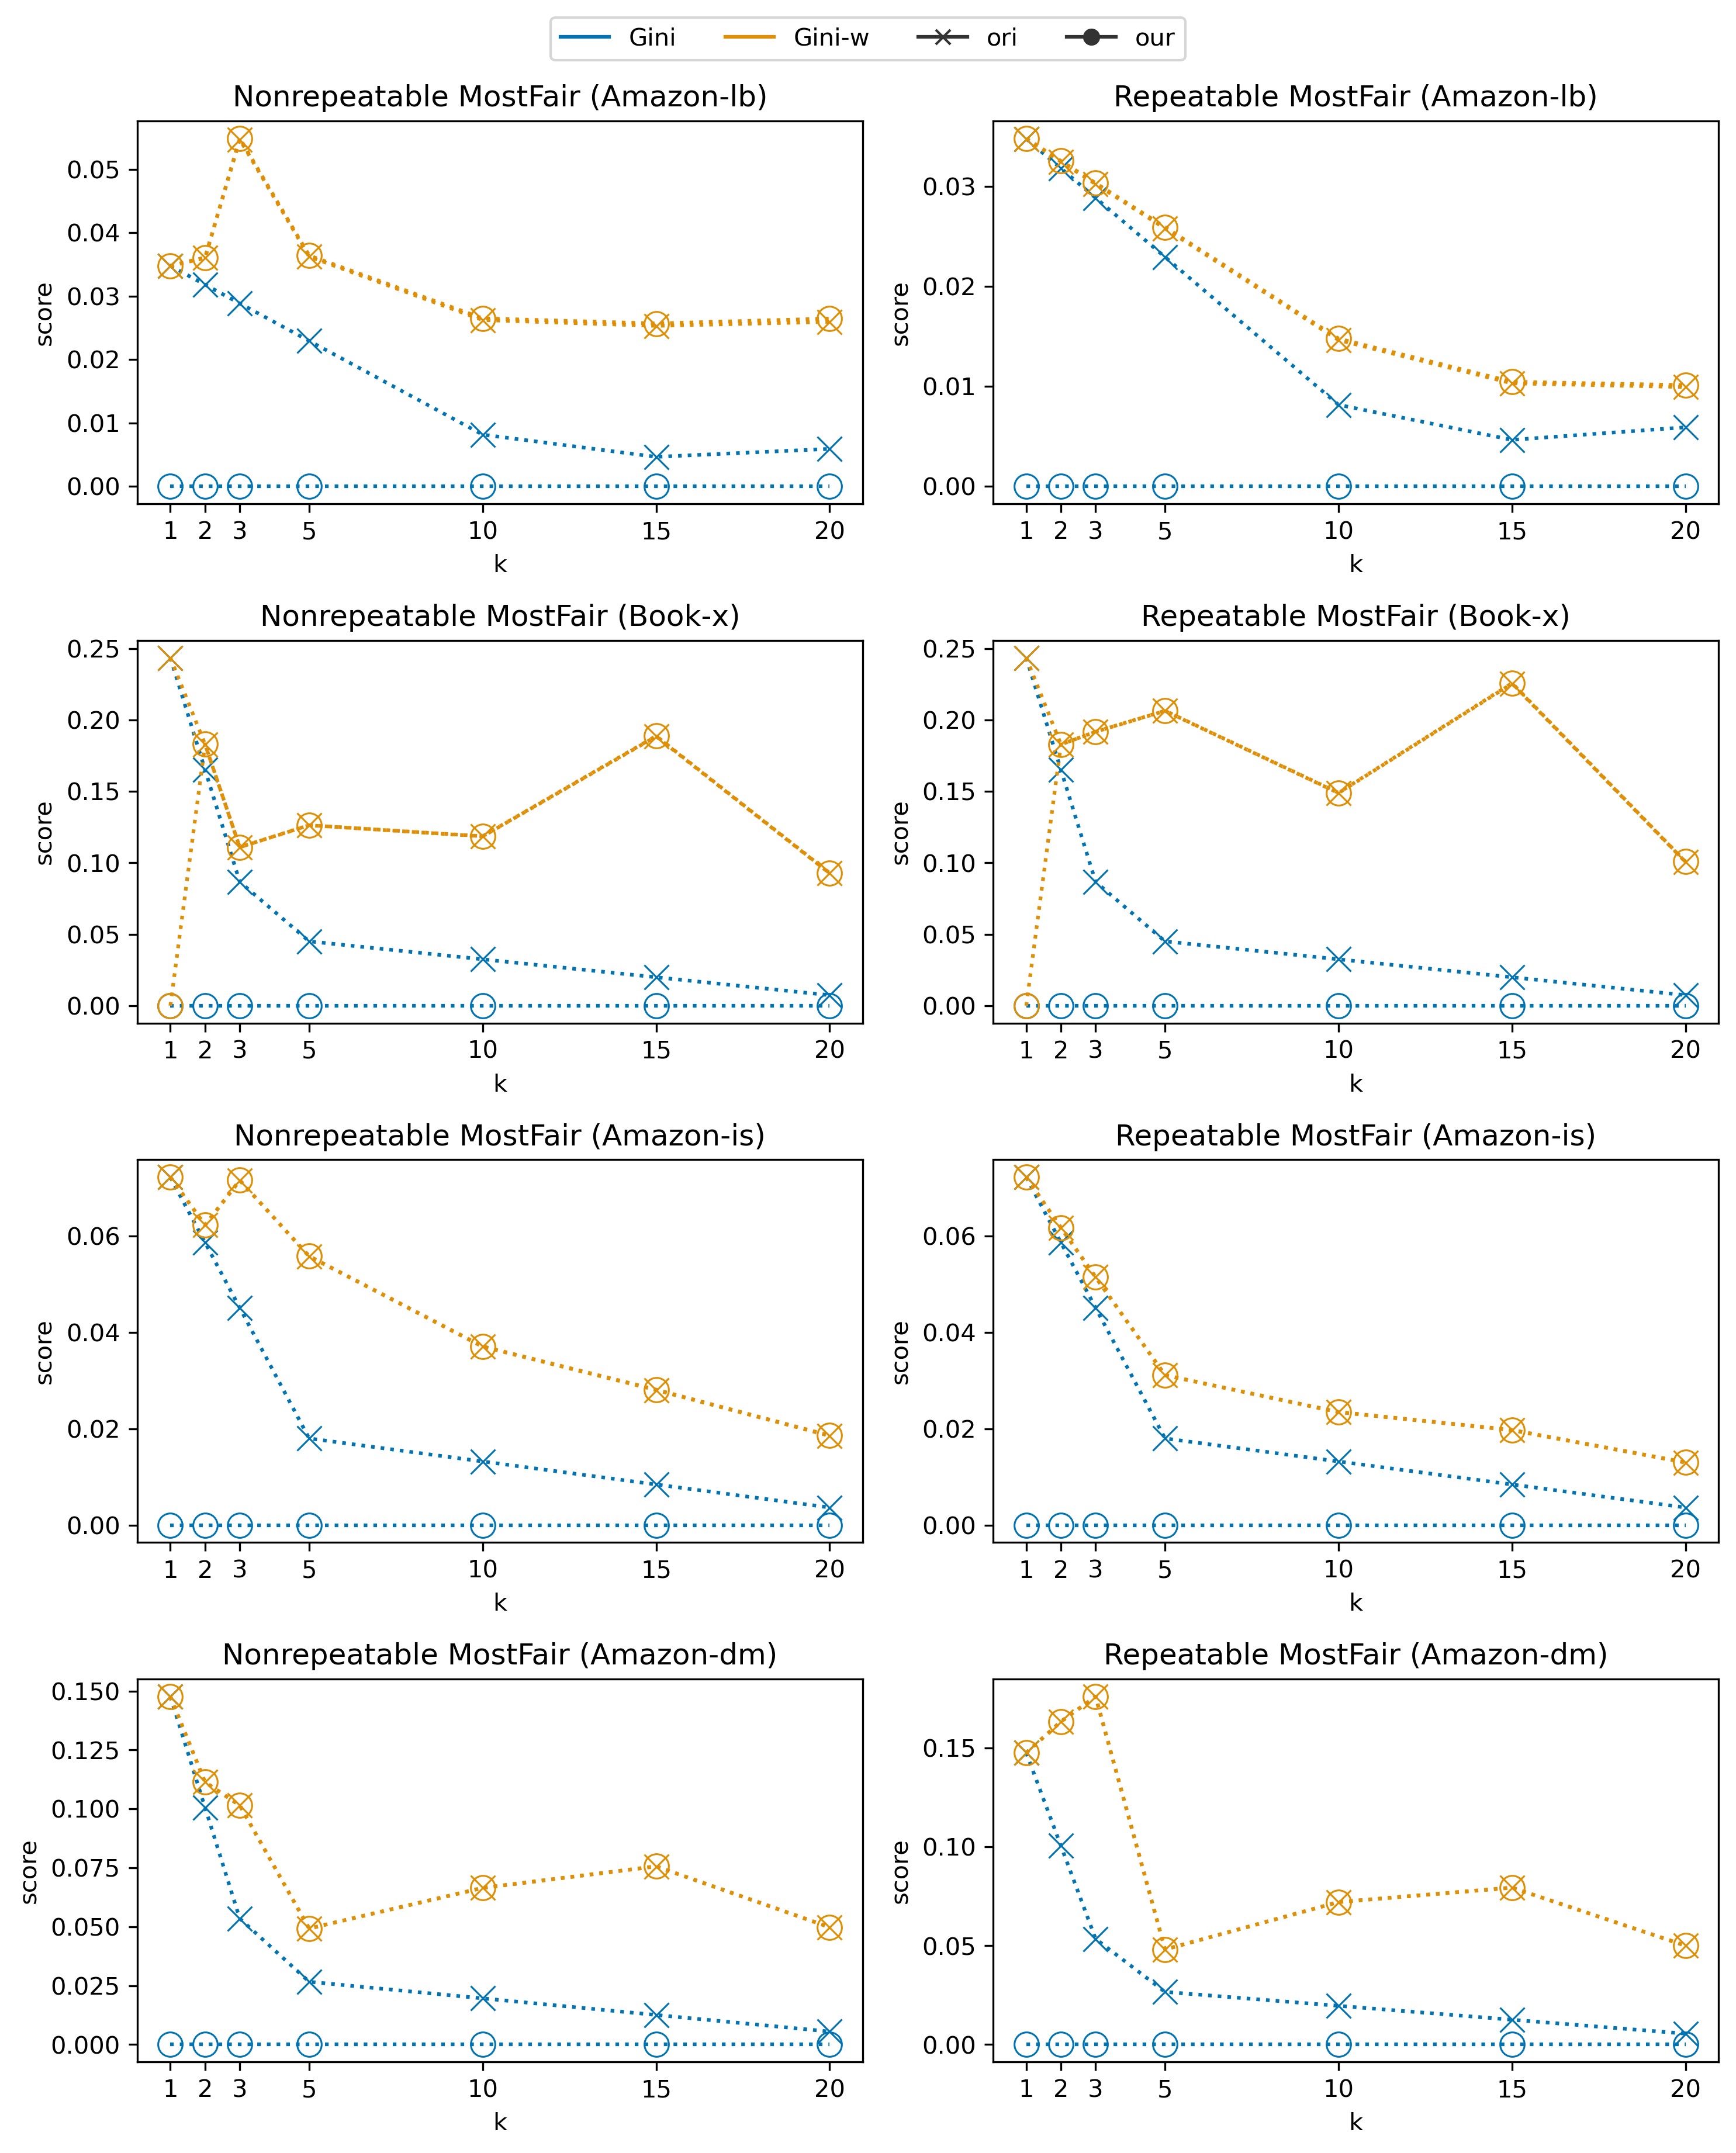

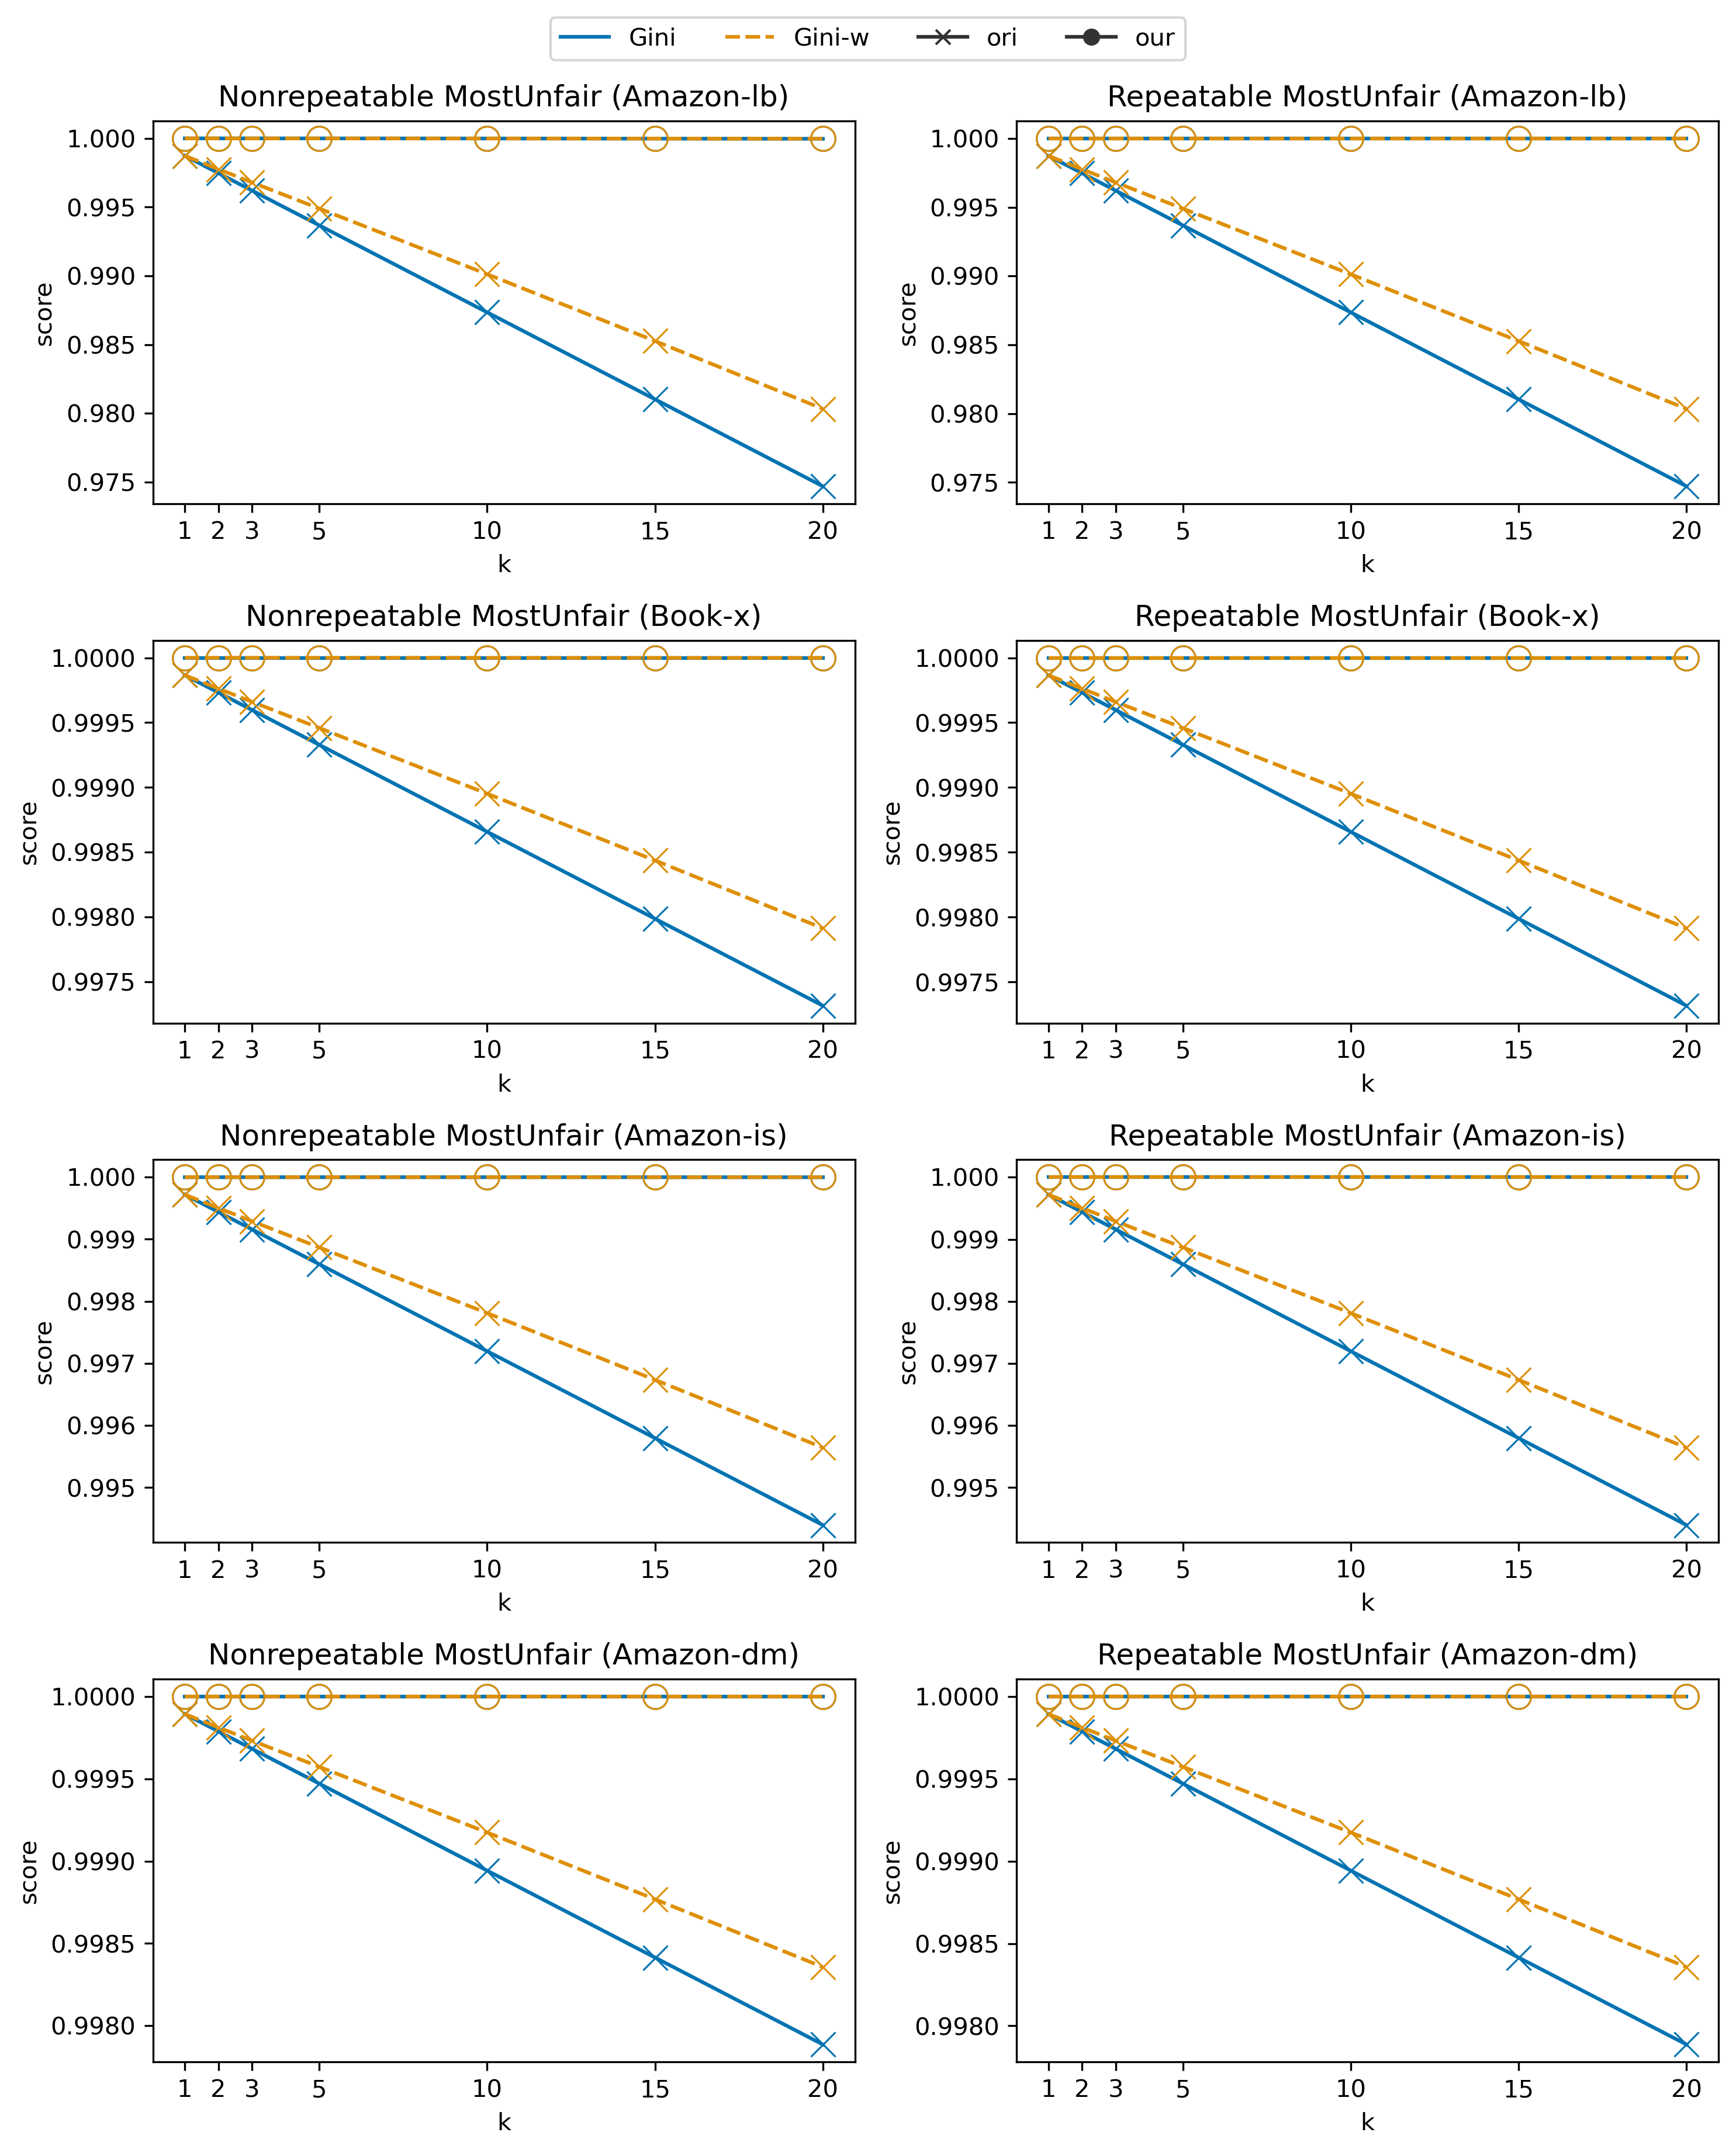

In [16]:

for df in list_df:

    fig, ax= plt.subplots(4, 2, figsize=(10,12))
    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[this_data.measure.str.contains("Gini")]
        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_fair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col,hue="measure", linestyle=":",
            style="measure", markers="x", dashes=False, ax=ax[d,i], **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col,hue="measure", linestyle=":",
                        style="measure", markers="o", dashes=False, ax=ax[d,i], **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score') #fix y-axis naming
            ax[d,i].set(xticks=list_k)  #fix x-ticks


    [[c.get_legend().remove() for c in r] for r in ax]
    all_labels = measure_label_nd + ori_label_nd + our_label_nd
    fig.legend(measure_handle_nd + ori_handle_nd + our_handle_nd, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.025), ncol=len(all_labels)
            )

    plt.tight_layout()

    fig, ax= plt.subplots(4, 2, figsize=(10,12))
    for d, data in enumerate(df):
        
        this_data = all_results.loc[data]
        this_data = this_data.reset_index()
        this_data = this_data.loc[this_data.measure.str.contains("Gini")]
        this_data["k"] = this_data["k"].apply(int)
        
        for i, col in enumerate(sorted(all_results.columns[(all_results.columns.str.contains("most"))& (all_results.columns.str.contains("_unfair", regex=False))])):

            sns.lineplot(this_data.query("version=='ori'"), x="k", y=col,hue="measure",
                        style="measure", markers="x", dashes=True, ax=ax[d,i], **additional_plotting_dict)
            sns.lineplot(this_data.query("version=='our'"), x="k", y=col,hue="measure",
                        style="measure", markers="o", dashes=True, ax=ax[d,i], **additional_plotting_dict)

            setting, model = prettify_col_title(col)

            ax[d,i].set_title(f"{setting} {model} ({data.capitalize()})")
            ax[d,i].set(ylabel='score') #fix y-axis naming
            ax[d,i].set(xticks=list_k)  #fix x-ticks
            

    [[c.get_legend().remove() for c in r] for r in ax]
    all_labels = measure_label+ori_label+our_label
    fig.legend(measure_handle+ori_handle+our_handle, all_labels, loc='upper center', 
            bbox_to_anchor=(0.5, 1.025), ncol=len(all_labels)
            )
    
    plt.tight_layout()